# lab_softmax

## Softmax 예제

공부한 시간(x1)과 수업 받은 시간(x2)에 대하여 성적 y=[A, B, C]을 받을 확률을 구하자

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train_data = np.loadtxt('data_softmax.txt', unpack=True, dtype='float32')

transpose를 해주어야 함.

In [2]:
x_data = np.transpose(train_data[0:3])
y_data = np.transpose(train_data[3:])

In [3]:
X = tf.placeholder('float', [None, 3])
Y = tf.placeholder('float', [None, 3])

W = tf.Variable(tf.zeros([3, 3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W))

(연습문제) learning_rate 조절하여 cost 수렵하기 

In [12]:
learning_rate = 0.1

In [13]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), reduction_indices=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)

init = tf.global_variables_initializer()
cost_history = np.empty(shape=[1],dtype=float)

In [14]:
with tf.Session() as sess:
    sess.run(init)

    for step in range(20001):
        feed = {X: x_data, Y: y_data}
        sess.run(train, feed_dict=feed )
        if step % 2000 == 0:
            print(step, sess.run(cost, feed_dict=feed ), sess.run(W))
        cost_history = np.append(cost_history,sess.run(cost, feed_dict=feed ))  
            
    print('------------------------')
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7]]})
    print('a=', a, sess.run(tf.argmax(a, 1)))        
    
    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4]]})
    print ('b=',b, sess.run(tf.argmax(b, 1)))

    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0]]})
    print('c=', c, sess.run(tf.argmax(c, 1)))

    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7], [1, 3, 4], [1, 1, 0]]})
    print ('all=',all, sess.run(tf.argmax(all, 1)))        

0 1.0678 [[-0.00833333  0.00416667  0.00416666]
 [ 0.01666667  0.02916667 -0.04583334]
 [ 0.01666666  0.04166667 -0.05833334]]
2000 0.361591 [[-6.95501471  0.21433842  6.7406764 ]
 [ 0.13668649  0.02956286 -0.16624542]
 [ 1.2420913   0.1036661  -1.3457557 ]]
4000 0.268268 [[-10.15374279   0.7183398    9.43540668]
 [  0.13394859   0.04668194  -0.18062133]
 [  1.84994256   0.03423374  -1.8841691 ]]
6000 0.218694 [[-12.44033241   0.95115668  11.4891777 ]
 [  0.13352925   0.0508402   -0.18435547]
 [  2.28680086   0.01493643  -2.30170703]]
8000 0.185758 [[-14.273036     1.06626189  13.2067709 ]
 [  0.13342234   0.051634    -0.18503679]
 [  2.63916636   0.01536592  -2.65447974]]
10000 0.161618 [[-15.82596588   1.12923706  14.69672012]
 [  0.13341101   0.05144376  -0.18483071]
 [  2.93901873   0.0232214   -2.96216846]]
12000 0.14297 [[-17.18381691   1.16946042  16.01434326]
 [  0.13344637   0.05098928  -0.18440738]
 [  3.20187807   0.03325099  -3.23504519]]
14000 0.128077 [[-18.39489555   1.2

test하기 :

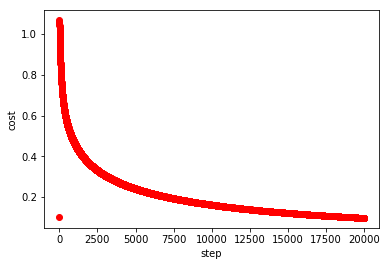

In [15]:
plt.plot(range(len(cost_history)),cost_history,'ro')
#plt.axis([0,np.log(epoch),0,np.max(cost_history)])
#plt.axis([0,epoch,0,60])
plt.xlabel('step')
plt.ylabel('cost')
plt.show()